In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from tkinter import Tk, filedialog
import warnings
warnings.filterwarnings('ignore')

# ============================================
# STEP 1: EARLY STEP - UPLOAD FILE CSV
# ============================================
print("="*60)
print("DECISION TREE CLASSIFIER - COMPLETE PIPELINE")
print("="*60)

# Upload file CSV menggunakan dialog
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("demand_forecasting_dataset.csv")
df

DECISION TREE CLASSIFIER - COMPLETE PIPELINE


Saving demand_forecasting_dataset.csv to demand_forecasting_dataset (4).csv


,date,product_id,category_id,store_id,historical_sales,price,promotion_flag,holiday_flag,economic_index,target_demand
0,2022-01-02,1043,4,9,16,48.29,0,0,84.07,8
1,2022-01-02,1012,4,2,25,44.01,0,0,106.87,22
2,2022-01-03,1003,5,4,26,9.44,1,0,104.98,29
3,2022-01-03,1005,4,1,23,5.42,1,1,92.75,22
4,2022-01-04,1011,1,5,12,21.86,1,1,103.60,27
...,...,...,...,...,...,...,...,...,...,...
4916,2035-06-19,1018,5,7,25,35.46,1,0,102.21,32
4917,2035-06-19,1029,5,4,21,15.05,0,1,82.47,17
4918,2035-06-19,1019,5,10,24,43.68,0,1,99.41,19
4919,2035-06-19,1027,5,4,23,25.52,0,0,93.95,22


In [ ]:
# ============================================
# STEP 2: DATA PREPROCESSING
# ============================================
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# c. Read Dataset
print("\n READ DATASET")
print("-" * 60)
print(f"Dataset berhasil dibaca dengan dimensi: {df.shape}")
print(f"Total baris: {df.shape[0]}")
print(f"Total kolom: {df.shape[1]}")

# d. Display Data Type Information and Non-Null Count
print("\n DATA TYPE INFORMATION AND NON-NULL COUNT")
print("-" * 60)
print(df.info())
print("\nRingkasan tipe data:")
print(df.dtypes.value_counts())

# e. Display Descriptive Statistics
print("\n DESCRIPTIVE STATISTICS")
print("-" * 60)
print(df.describe(include='all').T)

print("\nStatistik untuk kolom numerik:")
print(df.describe().T)

print("\nStatistik untuk kolom kategorikal:")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(df[categorical_cols].describe().T)

# f. Identify Missing Value
print("\n IDENTIFY MISSING VALUE")
print("-" * 60)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Kolom dengan missing values:")
    print(missing_df.to_string(index=False))
else:
    print(" Tidak ada missing values dalam dataset")

# g. Handling Missing Value
print("\n HANDLING MISSING VALUE")
print("-" * 60)
if df.isnull().sum().sum() > 0:
    print("Menerapkan strategi handling missing values...")

    # Untuk kolom numerik, isi dengan median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  • {col}: diisi dengan median ({median_val:.2f})")

    # Untuk kolom kategorikal, isi dengan modus
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"  • {col}: diisi dengan modus ({mode_val})")

    print("\n Missing values berhasil ditangani")
else:
    print(" Tidak ada missing values yang perlu ditangani")

# h. Identify Missing Value After Handling
print("\n VERIFY MISSING VALUE AFTER HANDLING")
print("-" * 60)
remaining_missing = df.isnull().sum().sum()
if remaining_missing == 0:
    print(" Semua missing values telah ditangani dengan baik")
    print(f"Total missing values: {remaining_missing}")
else:
    print(f" Masih ada {remaining_missing} missing values")
    print(df.isnull().sum()[df.isnull().sum() > 0])

# Drop Columns (jika ada kolom yang tidak relevan)
print("\n   DROP IRRELEVANT COLUMNS")
print("-" * 60)
# Identifikasi kolom dengan variasi rendah atau tidak relevan
low_variance_cols = []
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].std() == 0:
        low_variance_cols.append(col)

if len(low_variance_cols) > 0:
    print(f"Menghapus kolom dengan variance = 0: {low_variance_cols}")
    df = df.drop(columns=low_variance_cols)
else:
    print(" Tidak ada kolom yang perlu dihapus")

# Cek dan hapus duplicate
print("\n CHECK AND REMOVE DUPLICATES")
print("-" * 60)
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f" {duplicate_count} baris duplikat berhasil dihapus")
else:
    print(" Tidak ada baris duplikat")


DATA PREPROCESSING

📊 READ DATASET
------------------------------------------------------------
Dataset berhasil dibaca dengan dimensi: (4921, 10)
Total baris: 4921
Total kolom: 10

📋 DATA TYPE INFORMATION AND NON-NULL COUNT
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4921 entries, 0 to 4920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              4921 non-null   object 
 1   product_id        4921 non-null   int64  
 2   category_id       4921 non-null   int64  
 3   store_id          4921 non-null   int64  
 4   historical_sales  4921 non-null   int64  
 5   price             4921 non-null   float64
 6   promotion_flag    4921 non-null   int64  
 7   holiday_flag      4921 non-null   int64  
 8   economic_index    4921 non-null   float64
 9   target_demand     4921 non-null   int64  
dtypes: float64(2), int64(7), object(1)
me

In [ ]:
# ============================================
# STEP 3: HANDLING IMBALANCE DATA USING SMOTE
# ============================================
print("\n" + "="*60)
print("HANDLING IMBALANCE DATA USING SMOTE")
print("="*60)

# Identifikasi target variable
print("\nKolom yang tersedia:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# Change target_col to 'target_demand' as it is the correct target for this dataset
target_col = 'target_demand'
print(f"\nMemilih kolom target/label: {target_col}")

if target_col not in df.columns:
    print(f"✗ Kolom '{target_col}' tidak ditemukan!")
    # Exit is not ideal in a notebook environment, consider raising an error or passing
    raise ValueError(f"Target column '{target_col}' not found in the DataFrame.")


# Pisahkan features dan target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable jika kategorikal
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Cek distribusi kelas sebelum SMOTE
print("\nDistribusi kelas sebelum SMOTE:")
unique, counts = np.unique(y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Kelas {u}: {c} ({c/len(y)*100:.2f}%)")

# Apply SMOTE if data imbalance
# Check if there are enough samples for SMOTE
if len(unique) > 1:
    min_samples = min(counts)
    # Lower the imbalance ratio threshold or skip SMOTE for very sparse classes
    if max(counts) / min_samples > 1.5 and min_samples > 1:  # Added condition min_samples > 1
        print("\n Data imbalance terdeteksi, menerapkan SMOTE...")
        smote = SMOTE(random_state=42)
        X, y = smote.fit_resample(X, y)

        print("\nDistribusi kelas setelah SMOTE:")
        unique, counts = np.unique(y, return_counts=True)
        for u, c in zip(unique, counts):
            print(f"  Kelas {u}: {c} ({c/len(y)*100:.2f}%)")
    elif max(counts) / min_samples > 1.5 and min_samples <= 1:
        print("\n Data imbalance terdeteksi, tetapi beberapa kelas memiliki terlalu sedikit sampel (<= 1) untuk SMOTE. Melewatkan SMOTE.")
    else:
        print("\n Data sudah balance, SMOTE tidak diperlukan")
else:
     print("\n Hanya satu kelas ditemukan, SMOTE tidak dapat diterapkan.")


HANDLING IMBALANCE DATA USING SMOTE

Kolom yang tersedia:
  1. date
  2. product_id
  3. category_id
  4. store_id
  5. historical_sales
  6. price
  7. promotion_flag
  8. holiday_flag
  9. economic_index
  10. target_demand

Memilih kolom target/label: target_demand

Distribusi kelas sebelum SMOTE:
  Kelas 1: 1 (0.02%)
  Kelas 2: 2 (0.04%)
  Kelas 3: 3 (0.06%)
  Kelas 4: 3 (0.06%)
  Kelas 5: 7 (0.14%)
  Kelas 6: 14 (0.28%)
  Kelas 7: 21 (0.43%)
  Kelas 8: 20 (0.41%)
  Kelas 9: 47 (0.96%)
  Kelas 10: 63 (1.28%)
  Kelas 11: 83 (1.69%)
  Kelas 12: 108 (2.19%)
  Kelas 13: 120 (2.44%)
  Kelas 14: 191 (3.88%)
  Kelas 15: 182 (3.70%)
  Kelas 16: 246 (5.00%)
  Kelas 17: 241 (4.90%)
  Kelas 18: 220 (4.47%)
  Kelas 19: 281 (5.71%)
  Kelas 20: 312 (6.34%)
  Kelas 21: 232 (4.71%)
  Kelas 22: 293 (5.95%)
  Kelas 23: 250 (5.08%)
  Kelas 24: 218 (4.43%)
  Kelas 25: 214 (4.35%)
  Kelas 26: 189 (3.84%)
  Kelas 27: 170 (3.45%)
  Kelas 28: 191 (3.88%)
  Kelas 29: 123 (2.50%)
  Kelas 30: 128 (2.60%)
  

In [ ]:
# ============================================
# STEP 4: FEATURE ENGINEERING
# ============================================
print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("✓ Data berhasil dinormalisasi menggunakan StandardScaler")


FEATURE ENGINEERING
✓ Data berhasil dinormalisasi menggunakan StandardScaler



FEATURE CORRELATION
✓ Correlation matrix disimpan sebagai 'correlation_matrix.png'


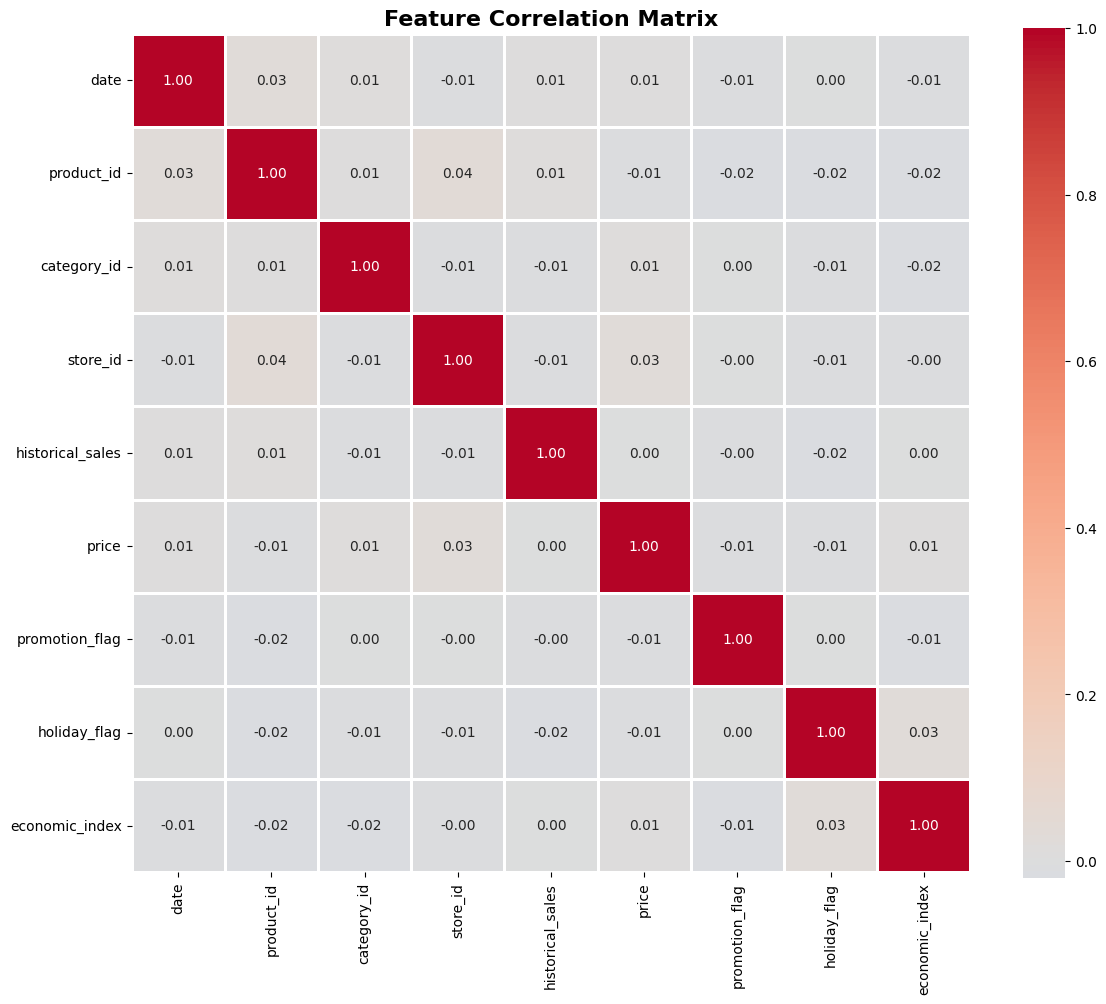

In [ ]:
# ============================================
# STEP 5: FEATURE CORRELATION
# ============================================
print("\n" + "="*60)
print("FEATURE CORRELATION")
print("="*60)

# Hitung korelasi
correlation_matrix = X.corr()

# Visualisasi correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Correlation matrix disimpan sebagai 'correlation_matrix.png'")
plt.show()

In [ ]:
# ============================================
# STEP 6: SPLITTING DATA
# ============================================
print("\n" + "="*60)
print("SPLITTING DATA")
print("="*60)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✓ Data berhasil dibagi:")
print(f"  Training set: {X_train.shape[0]} sampel")
print(f"  Testing set: {X_test.shape[0]} sampel")


SPLITTING DATA
✓ Data berhasil dibagi:
  Training set: 3936 sampel
  Testing set: 985 sampel


In [ ]:
# ============================================
# STEP 7: DECISION TREE WITH GRID SEARCH HYPERPARAMETER TUNING
# ============================================
print("\n" + "="*60)
print("DECISION TREE WITH GRID SEARCH HYPERPARAMETER TUNING")
print("="*60)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

print("\nMelakukan Grid Search untuk menemukan hyperparameter terbaik...")
print("Parameter yang diuji:", param_grid)

# Buat Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Grid Search dengan Cross Validation
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\n✓ Grid Search selesai!")
print(f"\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")

# Best model
best_model = grid_search.best_estimator_




DECISION TREE WITH GRID SEARCH HYPERPARAMETER TUNING

Melakukan Grid Search untuk menemukan hyperparameter terbaik...
Parameter yang diuji: {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None]}
Fitting 5 folds for each of 270 candidates, totalling 1350 fits

✓ Grid Search selesai!

Best Parameters:
  criterion: entropy
  max_depth: 5
  max_features: None
  min_samples_leaf: 1
  min_samples_split: 2

Best Cross-Validation Score: 0.0960



CONFUSION MATRIX
✓ Confusion matrix disimpan sebagai 'confusion_matrix.png'


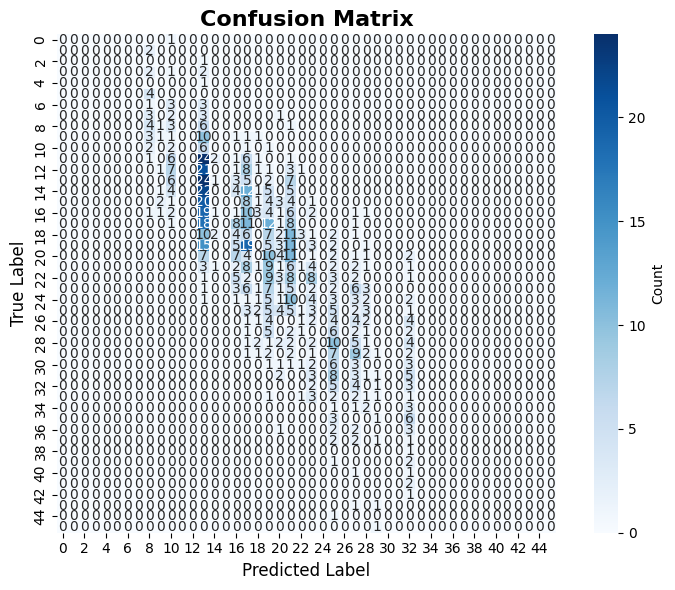

In [ ]:
# ============================================
# STEP 8: CONFUSION MATRIX
# ============================================
print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)

# Prediksi
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Confusion matrix disimpan sebagai 'confusion_matrix.png'")
plt.show()




DECISION TREE VISUALIZATION
✓ Decision tree disimpan sebagai 'decision_tree.png'


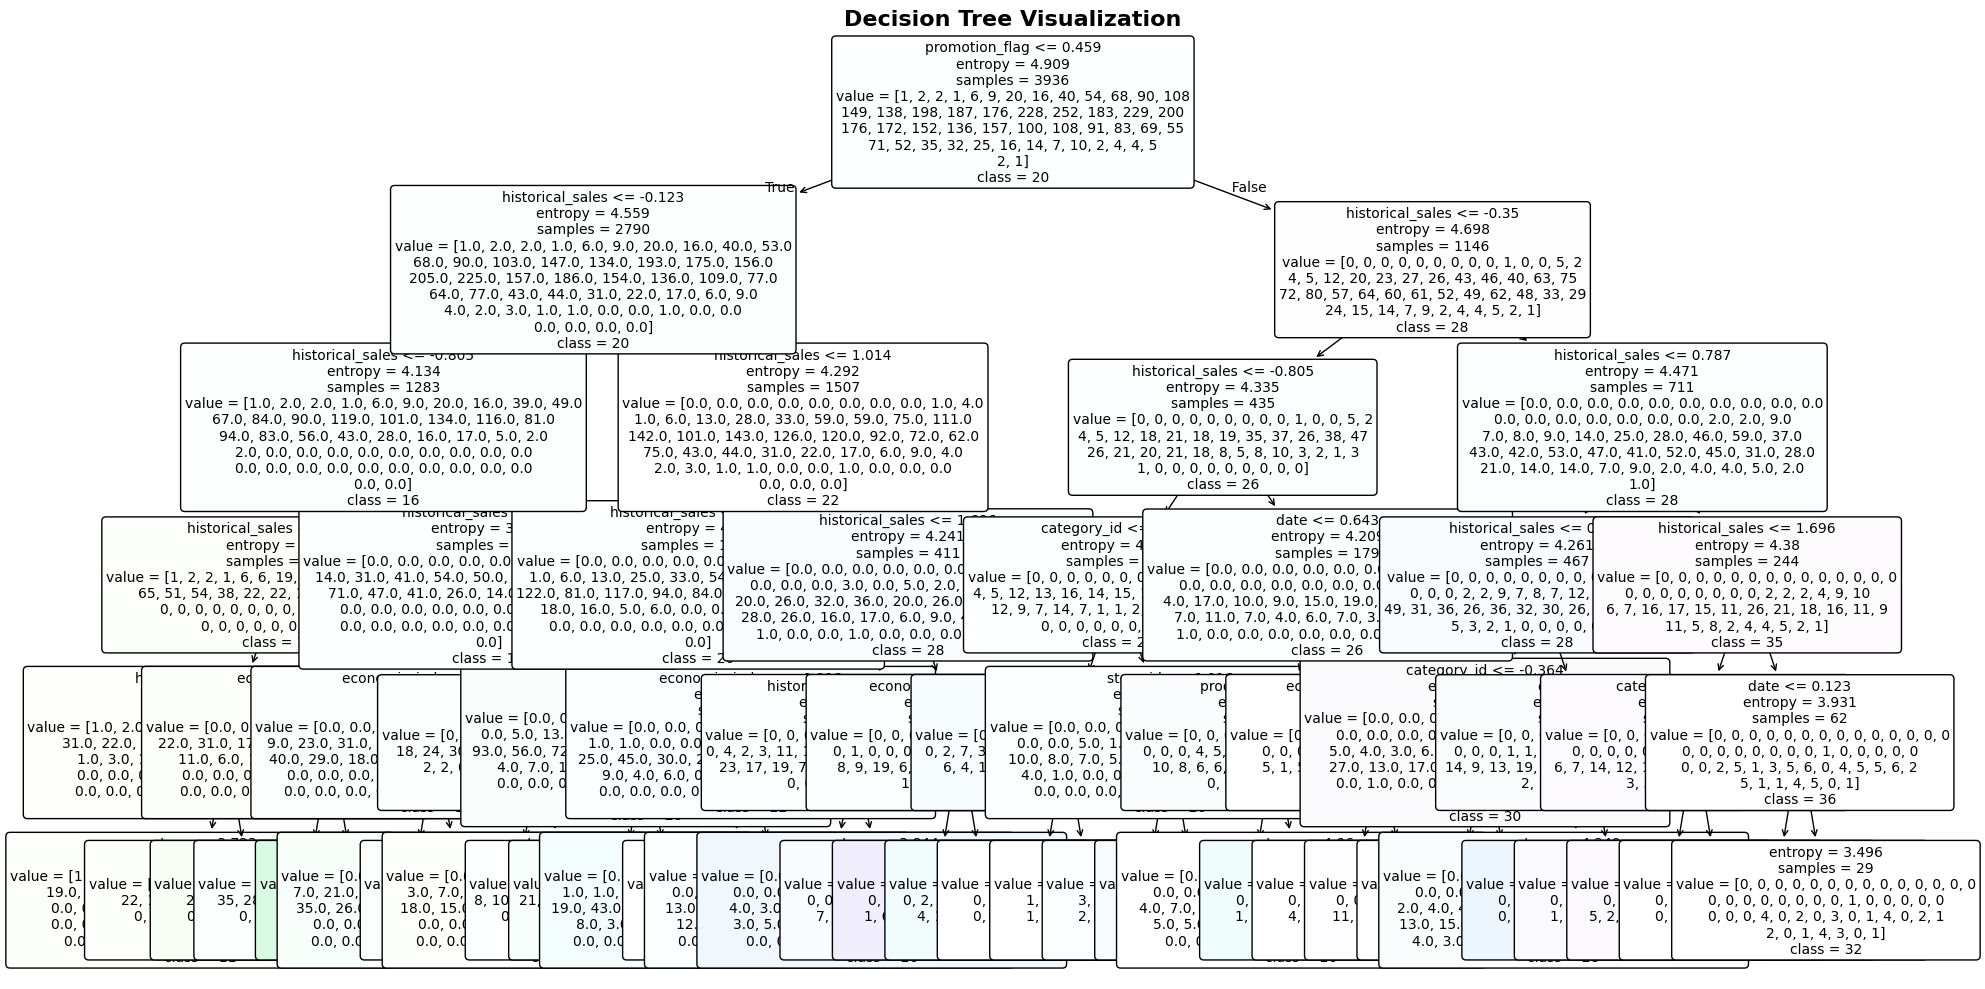

In [ ]:
# ============================================
# STEP 9: DECISION TREE VISUALIZATION
# ============================================
print("\n" + "="*60)
print("DECISION TREE VISUALIZATION")
print("="*60)

# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=[str(c) for c in np.unique(y)],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
print("✓ Decision tree disimpan sebagai 'decision_tree.png'")
plt.show()




RESULT - MODEL EVALUATION

1. Accuracy Score:
   Training Accuracy: 0.1387 (13.87%)
   Testing Accuracy:  0.0731 (7.31%)

2. Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         9
          11       0.17      0.27      0.21        15
          12       0.14      0.06      0.08        18
          13       0.05      0.17      0.08        12
          14       0.00      0.00      0.00        42
          15       0.00      0.00      0.00        44
          16       0.11      0.50      0.18        48
          17       0.00      0.00      0

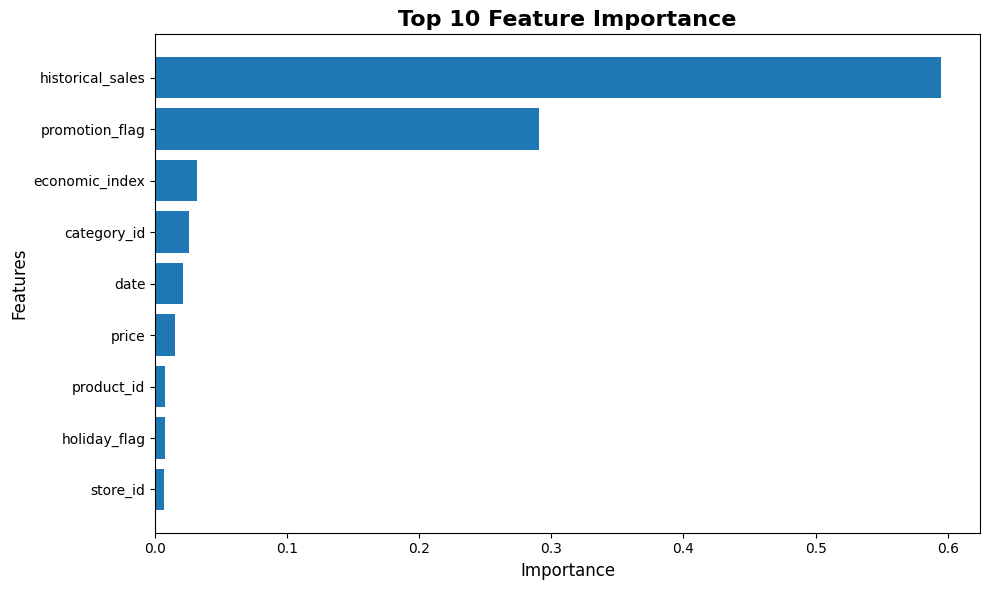


PIPELINE SELESAI!

File output yang dihasilkan:
  1. correlation_matrix.png
  2. confusion_matrix.png
  3. decision_tree.png
  4. feature_importance.png

✓ Semua proses selesai dengan sukses!


In [ ]:
# ============================================
# STEP 10: RESULT
# ============================================
print("\n" + "="*60)
print("RESULT - MODEL EVALUATION")
print("="*60)

# Accuracy
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"\n1. Accuracy Score:")
print(f"   Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification Report
print(f"\n2. Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
print(f"\n3. Feature Importance:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importance', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("\n✓ Feature importance disimpan sebagai 'feature_importance.png'")
plt.show()

print("\n" + "="*60)
print("PIPELINE SELESAI!")
print("="*60)
print("\nFile output yang dihasilkan:")
print("  1. correlation_matrix.png")
print("  2. confusion_matrix.png")
print("  3. decision_tree.png")
print("  4. feature_importance.png")
print("\n✓ Semua proses selesai dengan sukses!")